## Polynomial Regression







































In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:

•Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed

•Use matplotlib to visualize polynomial regressions

•Use matplotlib to visualize the same polynomial degree on different subsets of the data

•Use a validation set to select a polynomial degree

•Assess the final fit using test data

We will continue to use the House data from previous notebooks.

































#### Polynomial_sframe function
































Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:


In [3]:
import pandas as pd
import numpy as np

In [32]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe["power_1"] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x :x**power)
    return poly_sframe

### Load data

In [14]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [16]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])




Visualizing polynomial regression
































Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

































As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.


Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [17]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [19]:
poly1_data

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0
21332,390.0,245000.0
8623,410.0,325000.0
11500,420.0,229050.0
14466,420.0,280000.0
465,430.0,80000.0


NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [21]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(poly1_data["power_1"].reshape(len(poly1_data["power_1"]),1), poly1_data["price"].reshape(len(poly1_data["price"]), 1))


C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print (reg1.intercept_, reg1.coef_)

[-43580.74309447] [[ 280.6235679]]


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


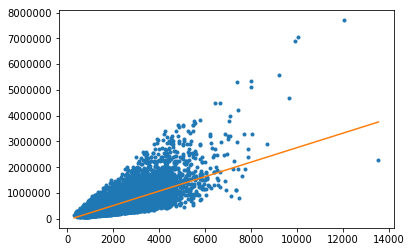

In [29]:
plt.plot(poly1_data['power_1'].reshape(len(poly1_data['power_1']),1),poly1_data['price'].reshape(len(poly1_data['price']),1),'.',
poly1_data['power_1'].reshape(len(poly1_data['power_1']),1), reg1.predict(poly1_data['power_1'].reshape(len(poly1_data['power_1']),1)),'-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?


In [52]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.columns
poly2_data['price'] = sales['price']

In [53]:
poly2_data.head()

,power_1,power_2,price
19452,290.0,84100.0,142000.0
15381,370.0,136900.0,276000.0
860,380.0,144400.0,245000.0
18379,384.0,147456.0,265000.0
4868,390.0,152100.0,228000.0


In [57]:
reg2 = LinearRegression()
reg2.fit(poly2_data[my_features], poly2_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
print (reg2.coef_, reg2.intercept_)

[  6.79940947e+01   3.85812609e-02] 199222.279305


C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


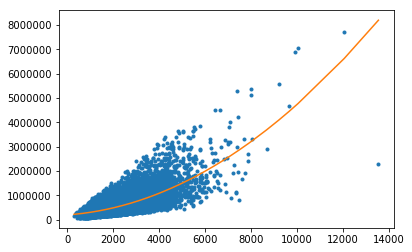

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(poly2_data['power_1'].reshape(len(poly2_data['power_1']),1),poly2_data['price'].reshape(len(poly2_data['price']),1),'.',
poly2_data['power_1'].reshape(len(poly2_data['power_1']),1), reg2.predict(poly2_data[my_features]),'-')         
































Now try a 15th degree polynomial:


In [67]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features = poly15_data.columns
poly15_data['price'] = sales['price']

In [69]:
reg15 = LinearRegression()
reg15.fit(poly15_data[my_features], poly15_data["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
print (reg15.coef_, reg15.intercept_)

[  4.56404164e-91  -2.64606502e-50   4.63312381e-56   2.48920611e-60
   0.00000000e+00   2.68575170e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53] 537116.329638


C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


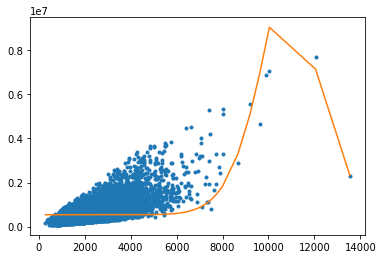

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(poly15_data['power_1'].reshape(len(poly15_data['power_1']),1),poly15_data['price'].reshape(len(poly15_data['price']),1),'.',
poly15_data['power_1'].reshape(len(poly15_data['power_1']),1), reg15.predict(poly15_data[my_features]),'-')         


### Changing the data and re-learning


We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
•First split sales into 2 subsets with .random_split(0.5, seed=0). 
•Next split the resulting subsets into 2 more subsets each. Use .random_split(0.5, seed=0).

We set seed=0 in these steps so that different users get consistent results. You should end up with 4 subsets (set_1, set_2, set_3, set_4) of approximately equal size. 
































Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.


In [73]:
def plot_15degree(set):
    poly15_data = polynomial_sframe(set['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = set['price']
    model15 = LinearRegression()
    model15.fit(poly15_data[my_features], poly15_data['price'])
    print (model15.intercept_, model15.coef_) #use print vs. return since return can only apply to function
    plt.plot(poly15_data['power_1'].reshape(len(poly15_data['power_1']),1),poly15_data['price'].reshape(len(poly15_data['price']),1),'.',
             poly15_data['power_1'].reshape(len(poly15_data['power_1']),1), model15.predict(poly15_data[my_features]),'-')


In [85]:
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [88]:
set1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1.0,0.75,430.0,5050,1,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200.0,7500.0
1,1352300580,20141114T000000,247000.0,1.0,1.00,460.0,4120,1,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990.0,4120.0
2,1320069249,20141020T000000,192500.0,1.0,1.00,470.0,63737,1,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350.0,46762.0
3,1437500015,20140709T000000,150000.0,3.0,0.75,490.0,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800.0,18297.0
4,0859000110,20141002T000000,125000.0,1.0,1.00,500.0,7440,1,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350.0,7440.0


539058.81867 [  3.05794168e-90   2.99618699e-49  -1.35167075e-54   0.00000000e+00
   0.00000000e+00   1.10357245e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52]


C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


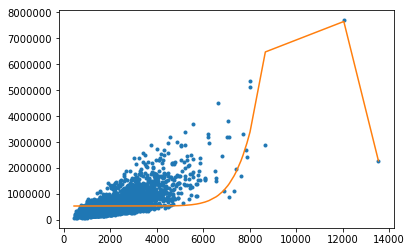

In [89]:
plot_15degree(set1)

506872.715927 [  2.71335943e-77   7.33541820e-39   9.00509861e-45   1.55384807e-49
   0.00000000e+00   0.00000000e+00   3.64549213e-55   1.50416255e-51
   5.76015654e-48   1.95770494e-44   5.39396529e-41   9.40376344e-38
  -3.63529135e-41   4.65476516e-45  -1.97199371e-49]


C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


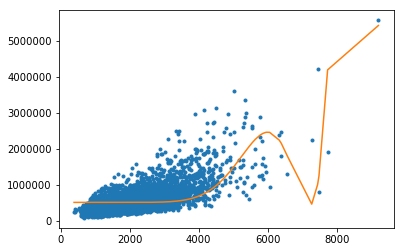

In [90]:
plot_15degree(set2)

530874.316653 [  2.83751934e-88  -7.80224229e-49   2.90828118e-55   0.00000000e+00
   0.00000000e+00   4.27894986e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51]


C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


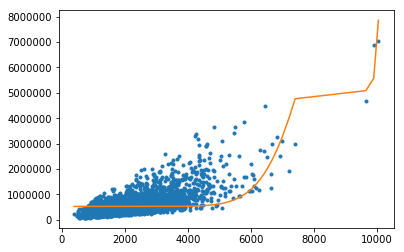

In [91]:
plot_15degree(set3)

494775.537266 [  1.37116053e-76   2.79722783e-40  -4.25247203e-44   2.77455891e-49
   0.00000000e+00   0.00000000e+00   1.27070051e-54   4.87868977e-51
   1.73549023e-47   5.47058325e-44   1.39587600e-40   2.25041873e-37
  -9.43954127e-41   1.31573061e-44  -6.09160302e-49]


C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\huodi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


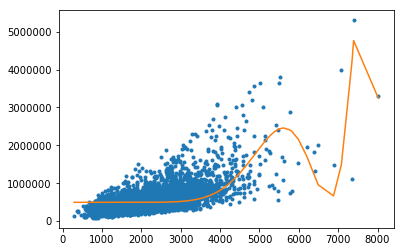

In [92]:
plot_15degree(set4)




### Selecting a Polynomial Degree







































Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:
•Split our sales data into 2 sets: training_and_validation and testing. Use random_split(0.9, seed=1).
•Further split our training data into two sets: training and validation. Use random_split(0.5, seed=1).

Again, we set seed=1 to obtain consistent results for different users.


In [93]:
from sklearn.model_selection import train_test_split

training_and_validation, testing = train_test_split(house_data, test_size = 0.1)
training, validation = train_test_split(training_and_validation, test_size = 0.5)

Next you should write a loop that does the following:

•For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))

◾Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree

◾hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)

◾Add train_data['price'] to the polynomial SFrame

◾Learn a polynomial regression model to sqft vs price with that degree on TRAIN data

◾Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.

•Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)


In [ ]:
def polynomial_model():
    for power in range(1,15+1):
        